In [1]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
%matplotlib inline

In [2]:
import sys, os
sys.path.insert(0, os.path.abspath("../src"))
import importlib
import aklab_imaging.data_view as dv

In [3]:
basepath = '../data'
ls = os.listdir(basepath)

In [72]:
ls[0]

'D2-632400-20000ms-slit_50u-000.nc'

In [73]:
filename = ls[0]
print(filename)
data = xr.open_dataset(os.path.join(basepath,filename))
data = data.rename({"__xarray_dataarray_variable__": "image_data"})
image = data['image_data'].data

D2-632400-20000ms-slit_50u-000.nc


In [75]:
importlib.reload(dv)
spectrum = dv.image_to_spectrum(image,limits=[300,400])
spectrum = spectrum - spectrum.min()
pixels = np.arange(spectrum.shape[0])
fig = dv.plot_spectrum(spectrum)

dg = dv.fit_single_gaussian(pixels,spectrum,[1040,1060],name=r'Dg fit',fig=fig)
hg = dv.fit_single_gaussian(pixels,spectrum,[1020,1037],name=r'Hg fit',fig=fig)
#Hg1 = dv.fit_single_gaussian(pixels,spectrum,[722,738],name=r'Mercury fit',fig=fig)
#Hg2 = dv.fit_single_gaussian(pixels,spectrum,[905,920],name=r'Mercury fit',fig=fig)
#Hg3 = dv.fit_single_gaussian(pixels,spectrum,[1044,1056],name=r'Mercury fit',fig=fig)
#ThAr1 = dv.fit_single_gaussian(pixels,spectrum,[895,910],name=r'ThAr fit',fig=fig)
#ThAr2 = dv.fit_single_gaussian(pixels,spectrum,[364,378],name=r'ThAr fit',fig=fig)
#ThAr3 = dv.fit_single_gaussian(pixels,spectrum,[1544,1560],name=r'ThAr fit',fig=fig)
#ThAr4 = dv.fit_single_gaussian(pixels,spectrum,[1482,1496],name=r'ThAr fit',fig=fig)

fig.show()

Dg fit center = 1049.880 fwhm = 6.743
Hg fit center = 1030.060 fwhm = 8.305


In [82]:
#pixtolam = lambda x: -5.978e-03*x+ 440.2037
coeff = [-2.76244673e-07, -5.33068727e-03,  4.39841180e+02]
poly = np.poly1d(coeff)
pixels = np.arange(spectrum.shape[0])
#lam = pixtolam(pixels)
lam = poly(pixels)
fig = dv.plot_spectrum(spectrum,x=lam)

dgamma = dv.fit_single_gaussian(lam,spectrum,[433.8,434],name=r'Dg fit',fig=fig)
hgamma = dv.fit_single_gaussian(lam,spectrum,[434,434.15],name=r'Hgamma fit',fig=fig)
fig.show()


Dg fit center = 433.940 fwhm = 0.040
Hgamma fit center = 434.057 fwhm = 0.050


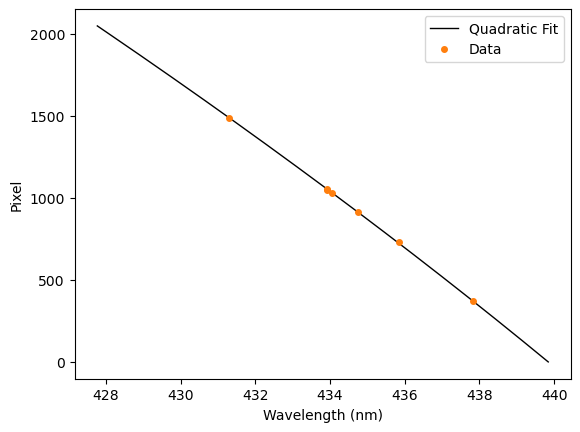

array([-2.76244673e-07, -5.33068727e-03,  4.39841180e+02])

In [60]:
x = np.array([1030.060,1049.880,730.290,912.497,1051.149,1488.884,370.502]) # pixels
['hgamma','dgamma','Hg1','Hg2','Hg3','ThAr','ThAr']
y = np.array([434.0471,433.92811,435.8335, 434.74945,433.92232,431.299799,437.817678 ]) # nm

coeffs = np.polyfit(x, y, 2)  # Fit a second-degree polynomial
poly = np.poly1d(coeffs)  # Create the polynomial function

# Generate fit data
x_fit = np.arange(2048)
y_fit = poly(x_fit)

# Plot the data and the fit
plt.plot(y_fit, x_fit, 'k-', lw=1, label='Quadratic Fit')
plt.plot(y, x, 'C1o', ms=4, label='Data')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Pixel')
plt.legend()
plt.show()

coeffs

In [8]:
#importlib.reload(dv)
#dv.image_interactive(image-1742.)